In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import librosa
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping

def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)
    # Extract features
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr), axis=1)
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr), axis=1)
    # Combine features
    features = np.concatenate((mfccs, chroma, mel, spectral_contrast, tonnetz))
    return features

def train_model(X, y):
    # Convert lists to numpy arrays
    X = np.array(X)
    y = np.array(y)
    # Check if there are enough samples for training and testing
    if len(X) < 2 or len(set(y)) < 2:
        raise ValueError("Insufficient data for training. Need at least two samples and two classes.")
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train a RandomForestClassifier as an example with early stopping
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

    # Make predictions on the test set
    predictions = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy}")
    print(f"Predictions: {predictions}")
    return model, scaler, predictions

def save_model(model, scaler, model_filename='audio_sentiment_model_rf.joblib', scaler_filename='sentiment_scaler_rf.joblib'):
    # Save the trained model and scaler
    joblib.dump(model, model_filename)
    joblib.dump(scaler, scaler_filename)
    print(f"Model and scaler saved as {model_filename} and {scaler_filename}")

def load_model(model_filename='audio_sentiment_model_rf.joblib', scaler_filename='sentiment_scaler_rf.joblib'):
    # Load the saved model and scaler
    model = joblib.load(model_filename)
    scaler = joblib.load(scaler_filename)
    print(f"Model and scaler loaded from {model_filename} and {scaler_filename}")
    return model, scaler

# Folder containing audio files
audio_folder = '/content/gdrive/MyDrive/wav'

# List to store audio file paths and sentiment labels
file_names = []
senti_values = []

# Iterate through files in the folder
for file_name in os.listdir(audio_folder):
    # Check if the path is a file (not a subdirectory)
    if os.path.isfile(os.path.join('/content/gdrive/MyDrive/wav', file_name)):
        file_names.append(audio_folder+'/'+ file_name)
# Print the list of file names
# print("File Names:", file_names)

csv_path = '/content/gdrive/MyDrive/updated_transcriptions_with_senti (1).csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)
# Extract values from the "Senti" column and store them in a list
senti_values = df['Senti'].tolist()

print (file_names)

# Create a dataset (X, y) with features and labels
X = [extract_features(path) for path in file_names]
y = senti_values

# Train the model
trained_model, trained_scaler, predictions = train_model(X, y)

# Save the trained model and scaler
save_model(trained_model, trained_scaler)

# Optionally, load the model and scaler for later use
loaded_model, loaded_scaler = load_model()

# Now you can use the loaded_model and loaded_scaler to make predictions on new data.
# Note: Ensure that the feature extraction process for new data is consistent with the one used during training.


['/content/gdrive/MyDrive/wav/1.wav', '/content/gdrive/MyDrive/wav/2.wav', '/content/gdrive/MyDrive/wav/3.wav', '/content/gdrive/MyDrive/wav/4.wav', '/content/gdrive/MyDrive/wav/6.wav', '/content/gdrive/MyDrive/wav/5.wav', '/content/gdrive/MyDrive/wav/7.wav', '/content/gdrive/MyDrive/wav/8.wav', '/content/gdrive/MyDrive/wav/9.wav', '/content/gdrive/MyDrive/wav/11.wav', '/content/gdrive/MyDrive/wav/10.wav', '/content/gdrive/MyDrive/wav/13.wav', '/content/gdrive/MyDrive/wav/14.wav', '/content/gdrive/MyDrive/wav/12.wav', '/content/gdrive/MyDrive/wav/16.wav', '/content/gdrive/MyDrive/wav/15.wav', '/content/gdrive/MyDrive/wav/17.wav', '/content/gdrive/MyDrive/wav/18.wav', '/content/gdrive/MyDrive/wav/19.wav', '/content/gdrive/MyDrive/wav/20.wav', '/content/gdrive/MyDrive/wav/22.wav', '/content/gdrive/MyDrive/wav/21.wav', '/content/gdrive/MyDrive/wav/24.wav', '/content/gdrive/MyDrive/wav/23.wav', '/content/gdrive/MyDrive/wav/25.wav', '/content/gdrive/MyDrive/wav/26.wav', '/content/gdrive/MyD

TypeError: BaseForest.fit() got an unexpected keyword argument 'validation_data'

In [ ]:
import pandas as pd
f= pd.read_csv('/content/gdrive/MyDrive/updated_transcriptions_with_senti (1).csv')
f.head(200)

,File,Transcription,Status,Length,WordCount,Senti
0,1.wav,پلیز ایک مشہور برینڈ ہے اور لوگوں کو بہت پسند ...,Transcribed,21.04,42,0
1,2.wav,پلیز میرا پسندیدہ اسنیک ہے اور ہر بائیک مجھے خ...,Transcribed,23.07,34,1
2,3.wav,میرا نام اسان عبداللہ اور اج مجھ سے رزق لیز کا...,Transcribed,28.16,85,2
3,4.wav,السلام علیکم میرا نام اسان عبداللہ ہے اور اج س...,Transcribed,26.74,66,1
4,5.wav,السلام علیکم میرا نام ارشد ہے ماجد ہے اور اج م...,Transcribed,29.31,82,2
...,...,...,...,...,...,...
106,108.wav,السلام علیکم اج موسی پیسوں کا ریویو لیا جارہا ...,Transcribed,30.251,90,0
107,109.wav,اپ مجھ سے پیپسی کا ریویو لیا جا رہا ہے پیپسی ب...,Transcribed,37.61,113,2
108,110.wav,مولانا مثان عبداللہ ہے اور اج مجھ سے ایک پیچی ...,Transcribed,27.07,73,1
109,111.wav,السلام علیکم اج مجھ سے ریلیز کا ریویو لیے جارہ...,Transcribed,22.72,70,1


In [ ]:
import librosa
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score

def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)
    # Extract features
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr), axis=1)
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr), axis=1)
    # Combine features
    features = np.concatenate((mfccs, chroma, mel, spectral_contrast, tonnetz))
    return features

def train_model(X, y):
    # Convert lists to numpy arrays
    X = np.array(X)
    y = np.array(y)
    # Check if there are enough samples for training and testing
    if len(X) < 2 or len(set(y)) < 2:
        raise ValueError("Insufficient data for training. Need at least two samples and two classes.")
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Train a RandomForestClassifier as an example
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    # Make predictions on the test set
    predictions = model.predict(X_test_scaled)
    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy}")
    print(f"Predictions: {predictions}")
    return model, scaler, predictions

def save_model(model, scaler, model_filename='Audio_sentiment_model_B.joblib', scaler_filename='sentiment_scaler.joblib'):
    # Save the trained model and scaler
    joblib.dump(model, model_filename)
    joblib.dump(scaler, scaler_filename)
    print(f"Model and scaler saved as {model_filename} and {scaler_filename}")

def load_model(model_filename='Audio_sentiment_model_B.joblib', scaler_filename='sentiment_scaler.joblib'):
    # Load the saved model and scaler
    model = joblib.load(model_filename)
    scaler = joblib.load(scaler_filename)
    print(f"Model and scaler loaded from {model_filename} and {scaler_filename}")
    return model, scaler

# Folder containing audio files
audio_folder = '/content/gdrive/MyDrive/wav'

# List to store audio file paths and sentiment labels
file_names = []
senti_values = []

# Iterate through files in the folder
for file_name in os.listdir(audio_folder):
    # Check if the path is a file (not a subdirectory)
    if os.path.isfile(os.path.join('/content/gdrive/MyDrive/wav', file_name)):
        file_names.append(audio_folder+'/'+ file_name)
# Print the list of file names
# print("File Names:", file_names)


csv_path = '/content/gdrive/MyDrive/updated_transcriptions_with_senti (1).csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)
# Extract values from the "Senti" column and store them in a list
senti_values = df['Senti'].tolist()

print (file_names)

# Create a dataset (X, y) with features and labels
X = [extract_features(path) for path in file_names]
y = senti_values

# Train the model
trained_model, trained_scaler , predictions = train_model(X, y)

# Save the trained model and scaler
save_model(trained_model, trained_scaler)

# Optionally, load the model and scaler for later use
loaded_model, loaded_scaler = load_model()

# Now you can use the loaded_model and loaded_scaler to make predictions on new data.
# Note: Ensure that the feature extraction process for new data is consistent with the one used during training.


predictions = trained_model.predict(X_test_scaled)
#Calculate precision
precision = precision_score(y, predictions, average='weighted')
#Calculate recall
recall = recall_score(y, predictions, average='weighted')
#Calculate F1 score
f1 = f1_score(y, predictions, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


['/content/gdrive/MyDrive/wav/1.wav', '/content/gdrive/MyDrive/wav/2.wav', '/content/gdrive/MyDrive/wav/3.wav', '/content/gdrive/MyDrive/wav/4.wav', '/content/gdrive/MyDrive/wav/6.wav', '/content/gdrive/MyDrive/wav/5.wav', '/content/gdrive/MyDrive/wav/7.wav', '/content/gdrive/MyDrive/wav/8.wav', '/content/gdrive/MyDrive/wav/9.wav', '/content/gdrive/MyDrive/wav/11.wav', '/content/gdrive/MyDrive/wav/10.wav', '/content/gdrive/MyDrive/wav/13.wav', '/content/gdrive/MyDrive/wav/14.wav', '/content/gdrive/MyDrive/wav/12.wav', '/content/gdrive/MyDrive/wav/16.wav', '/content/gdrive/MyDrive/wav/15.wav', '/content/gdrive/MyDrive/wav/17.wav', '/content/gdrive/MyDrive/wav/18.wav', '/content/gdrive/MyDrive/wav/19.wav', '/content/gdrive/MyDrive/wav/20.wav', '/content/gdrive/MyDrive/wav/22.wav', '/content/gdrive/MyDrive/wav/21.wav', '/content/gdrive/MyDrive/wav/24.wav', '/content/gdrive/MyDrive/wav/23.wav', '/content/gdrive/MyDrive/wav/25.wav', '/content/gdrive/MyDrive/wav/26.wav', '/content/gdrive/MyD

NameError: name 'X_test_scaled' is not defined

In [ ]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)

    # Extract features
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr), axis=1)
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr), axis=1)

    # Combine features
    features = np.concatenate((mfccs, chroma, mel, spectral_contrast, tonnetz))

    return features

# Example usage
#audio_file_path = 'path/to/your/audio/file.wav'
audio_file_path = '/content/gdrive/MyDrive/24_@A.wav'

audio_features = extract_features(audio_file_path)
print (audio_features)

# Example of training a basic model
# Assuming you have a dataset with labeled audio files (positive/negative sentiment)
# X should be a list of features, y should be a list of labels

# Load your dataset
# X, y = load_your_dataset()

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier as an example
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train_scaled, y_train)

# Make predictions on the test set
# predictions = model.predict(X_test_scaled)

# Evaluate the model
# accuracy = accuracy_score(y_test, predictions)
# print(f"Accuracy: {accuracy}")


[-3.27463348e+02  1.12204498e+02 -8.10919857e+00  2.94178028e+01
 -1.67227039e+01  9.49638462e+00 -1.78452263e+01 -4.26297092e+00
  5.82732439e+00 -6.14208126e+00  5.37329578e+00 -5.86726487e-01
  7.00767851e+00  1.67409346e-01  1.61400005e-01  1.62266284e-01
  2.30214462e-01  3.06417108e-01  2.76006758e-01  3.52055460e-01
  3.34469855e-01  3.07778955e-01  2.71340728e-01  2.12543800e-01
  1.64030358e-01  9.18536354e-03  1.84968263e-01  3.57776582e-01
  1.45112321e-01  9.35668796e-02  2.77055744e-02  2.18098108e-02
  1.11601679e-02  1.24663925e-02  6.63648173e-02  1.34358406e-01
  6.03359580e-01  1.20506763e+00  2.41989851e+00  2.67201424e+00
  1.73015702e+00  1.37852764e+00  8.62719059e-01  5.21922052e-01
  6.25344098e-01  3.38928431e-01  4.27447259e-01  1.83213127e+00
  1.92606533e+00  3.75599527e+00  1.88236928e+00  9.38107848e-01
  1.08853912e+00  1.09562111e+00  1.26625192e+00  5.89048207e-01
  5.21344662e-01  5.47487617e-01  3.05396467e-01  5.16760945e-01
  1.42054543e-01  9.54020

In [ ]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)

    # Extract features
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr), axis=1)
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr), axis=1)

    # Combine features
    features = np.concatenate((mfccs, chroma, mel, spectral_contrast, tonnetz))

    return features

# Example usage
#audio_file_path = 'path/to/your/audio/file.wav'
audio_file_path = '/content/gdrive/MyDrive/work2/mono/26.wav'

audio_features = extract_features(audio_file_path)
print (audio_features)

# Example of training a basic model
# Assuming you have a dataset with labeled audio files (positive/negative sentiment)
# X should be a list of features, y should be a list of labels

# Load your dataset
# X, y = load_your_dataset()

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier as an example
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train_scaled, y_train)

# Make predictions on the test set
# predictions = model.predict(X_test_scaled)

# Evaluate the model
# accuracy = accuracy_score(y_test, predictions)
# print(f"Accuracy: {accuracy}")


[-3.62759430e+02  1.04221764e+02 -1.12517128e+01  5.41362286e+00
 -1.40860910e+01  1.90727389e+00 -2.58853416e+01 -4.58559322e+00
 -8.78201962e-01 -7.02936220e+00 -7.62920260e-01 -7.01712227e+00
  2.38480139e+00  2.24848345e-01  2.16696888e-01  2.72464603e-01
  3.20367038e-01  3.33791643e-01  3.07366610e-01  3.01714480e-01
  3.27414662e-01  3.44618618e-01  2.89850861e-01  2.37928629e-01
  2.23577112e-01  6.67233719e-04  6.82688970e-03  1.49193797e-02
  1.65090691e-02  1.18748723e-02  4.32898663e-03  5.41565940e-03
  5.26410900e-03  6.32020785e-03  5.23698851e-02  2.11380824e-01
  7.34096110e-01  1.02571511e+00  6.34989917e-01  1.04602885e+00
  1.20273983e+00  9.44051743e-01  5.88544428e-01  3.90742749e-01
  6.07840061e-01  6.54706836e-01  1.75384068e+00  2.92178726e+00
  1.56989086e+00  1.57720006e+00  9.48521256e-01  7.14138687e-01
  8.09266925e-01  4.93624598e-01  4.62304384e-01  7.86054492e-01
  9.59099114e-01  4.42064196e-01  1.51660353e-01  3.27700883e-01
  6.46904111e-01  4.07550

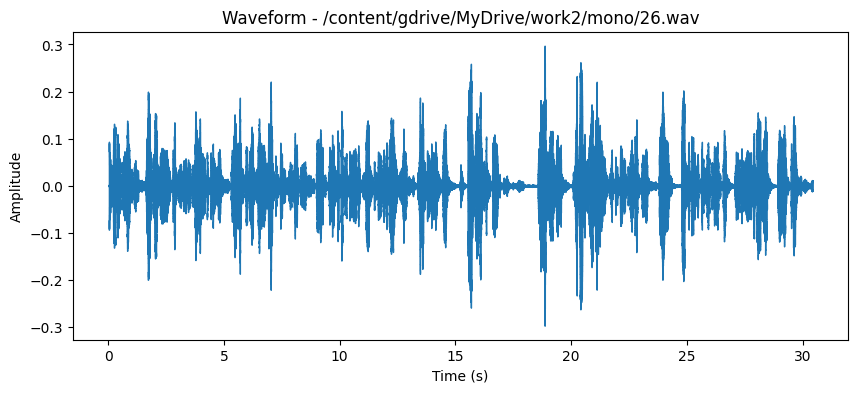

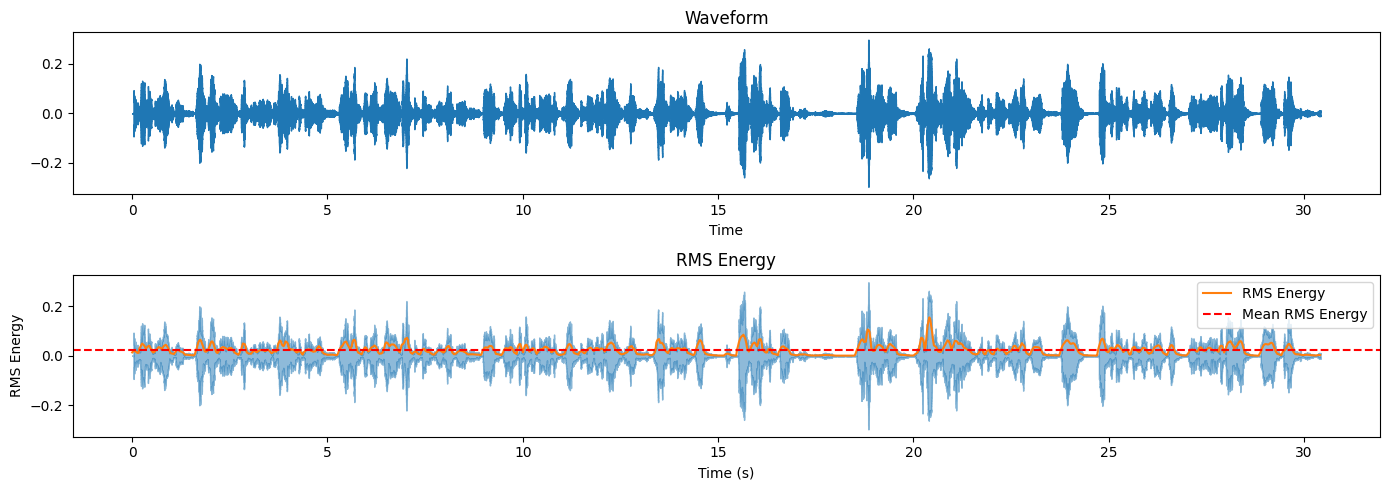

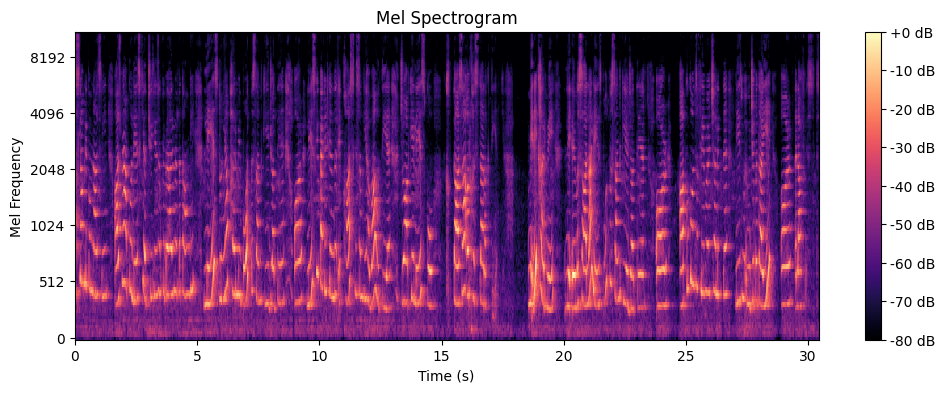

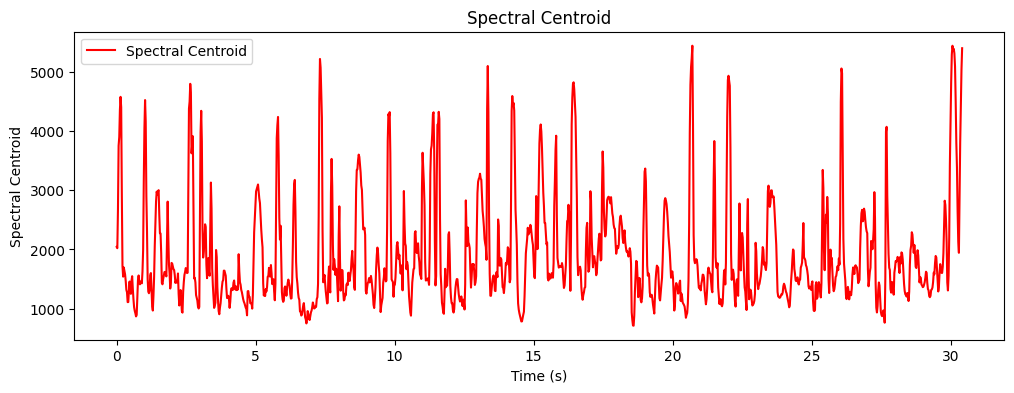

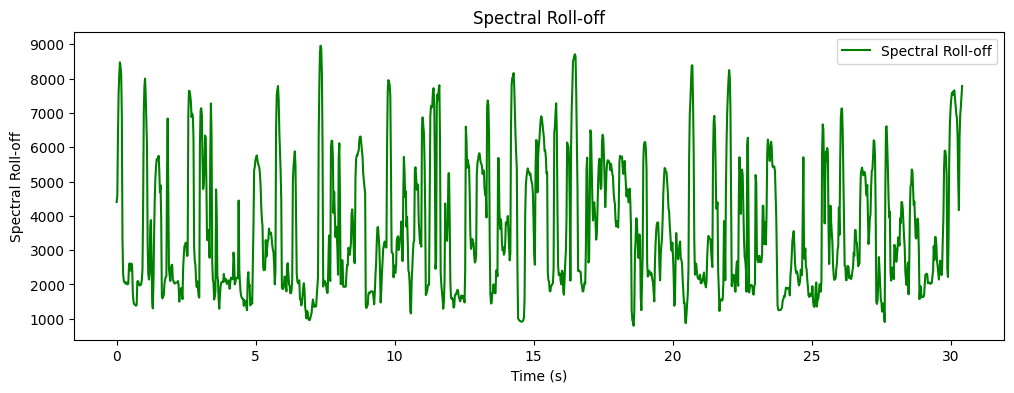

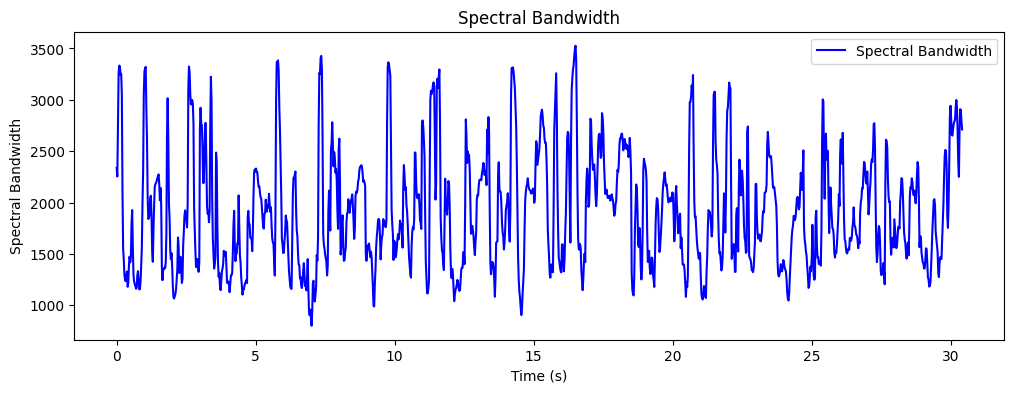

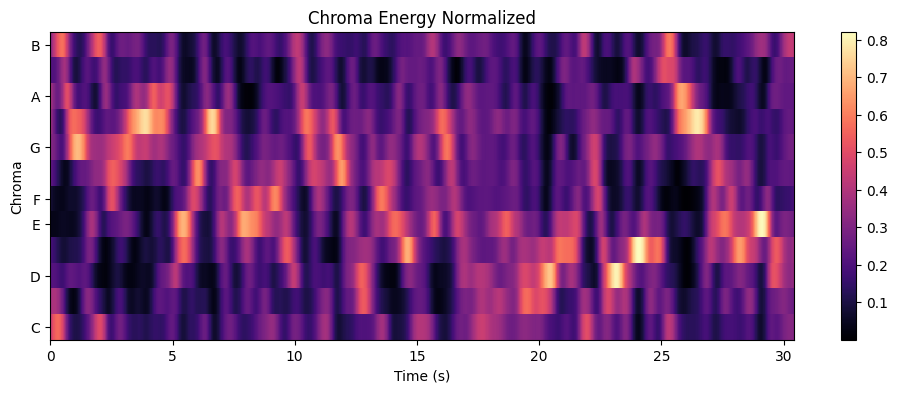

TypeError: unsupported format string passed to numpy.ndarray.__format__

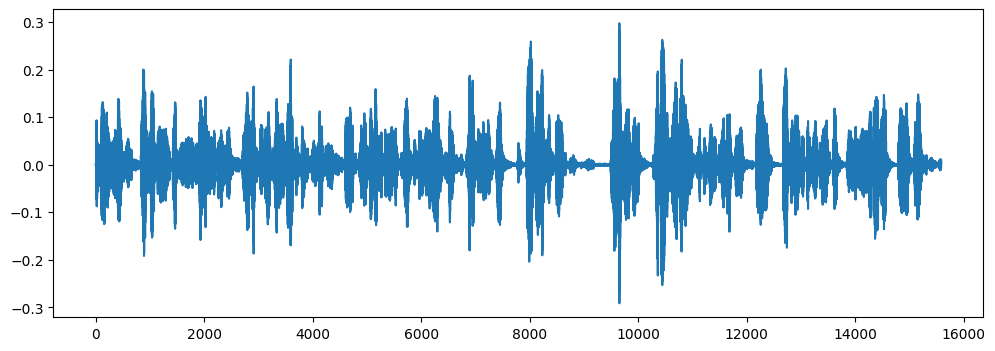

In [ ]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np  # Add this line to import NumPy

# Optionally, load the model and scaler for later use
# loaded_model, loaded_scaler = load_model()
# Evaluate the loaded model on the same training data
# X_scaled = loaded_scaler.transform(X)
# predictions = loaded_model.predict(X_scaled)

# audio_file_paths = ['/content/gdrive/MyDrive/wav/44.wav', '/content/gdrive/MyDrive/wav/49.wav', '/content/gdrive/MyDrive/wav/58.wav', '/content/gdrive/MyDrive/25_@A.wav', '/content/gdrive/MyDrive/25_@B.wav', '/content/gdrive/MyDrive/wav/25_@C.wav']
audio_file_paths = ['/content/gdrive/MyDrive/work2/mono/26.wav', '/content/gdrive/MyDrive/work2/mono/101.wav']

##sentiment_labels = [2,1, 0, 2,1, 0, 1,2,0]  # 0 for Neutral,  1 for positive sentiment, 2 for negative sentiment
# Display predictions
# for i, (file_path, sentiment_label, prediction) in enumerate(zip(audio_file_paths, y, predictions)):
#     print(f"Audio File: {file_path}, True Sentiment: {sentiment_label}, Predicted Sentiment: {prediction}")

# Visualize the audio data
for i, file_path in enumerate(audio_file_paths):
    # Load audio file
    y, sr = librosa.load(file_path)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform - {file_path}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot RMS ( For Plot the waveform and highlight regions where RMS is above a certain threshold)
    rms = librosa.feature.rms(y=y)[0]
    plt.figure(figsize=(14, 5))
    # Plot waveform
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    # Plot RMS
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(y, sr=sr, alpha=0.5)  # Overlay the waveform
    plt.plot(librosa.times_like(rms), rms, label='RMS Energy')
    plt.axhline(y=np.mean(rms), color='r', linestyle='--', label='Mean RMS Energy')
    plt.title('RMS Energy')
    plt.xlabel('Time (s)')
    plt.ylabel('RMS Energy')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Mel Frequency')
    plt.show()

    # Plot Spectral Centroid
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    plt.figure(figsize=(12, 4))
    plt.plot(librosa.times_like(centroid), centroid, label='Spectral Centroid', color='r')
    plt.title('Spectral Centroid')
    plt.xlabel('Time (s)')
    plt.ylabel('Spectral Centroid')
    plt.legend()
    plt.show()

    # Plot Spectral Roll-off
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
    plt.figure(figsize=(12, 4))
    plt.plot(librosa.times_like(rolloff), rolloff, label='Spectral Roll-off', color='g')
    plt.title('Spectral Roll-off')
    plt.xlabel('Time (s)')
    plt.ylabel('Spectral Roll-off')
    plt.legend()
    plt.show()

    # Plot Spectral Bandwidth
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    plt.figure(figsize=(12, 4))
    plt.plot(librosa.times_like(bandwidth), bandwidth, label='Spectral Bandwidth', color='b')
    plt.title('Spectral Bandwidth')
    plt.xlabel('Time (s)')
    plt.ylabel('Spectral Bandwidth')
    plt.legend()
    plt.show()

    # Plot Chroma Energy Normalized
    chroma_energy_normalized = librosa.feature.chroma_cens(y=y, sr=sr)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(chroma_energy_normalized, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chroma Energy Normalized')
    plt.xlabel('Time (s)')
    plt.ylabel('Chroma')
    plt.show()

    # Plot Tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    plt.figure(figsize=(12, 4))
    plt.plot(librosa.times_like(y), y, label='Waveform')
    plt.title(f'Tempo: {tempo:.2f} BPM')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

    # Plot Spectral Contrast
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(contrast, x_axis='time')
    plt.colorbar()
    plt.title('Spectral Contrast')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency Band')
    plt.show()

    # Plot Harmonic & Percussive Components
    harmonic, percussive = librosa.effects.hpss(y)
    plt.figure(figsize=(12, 4))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(harmonic, sr=sr, alpha=0.5)
    plt.title('Harmonic Component')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(percussive, sr=sr, alpha=0.5)
    plt.title('Percussive Component')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

    # Plot MFCC
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs')
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficients')
    plt.show()

    # Plot Energy Contour
    energy_contour = librosa.feature.tempogram(y=y, sr=sr)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(energy_contour, x_axis='time')
    plt.colorbar()
    plt.title('Energy Contour')
    plt.xlabel('Time (s)')
    plt.ylabel('Tempo')
    plt.show()

    # Plot Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y)
    # Plot Zero Crossing Rate
    plt.figure(figsize=(12, 4))
    plt.plot(librosa.times_like(zcr), zcr[0], label='Zero Crossing Rate', color='m')
    plt.title('Zero Crossing Rate')
    plt.xlabel('Time (s)')
    plt.ylabel('Zero Crossing Rate')
    plt.legend()
    plt.show()



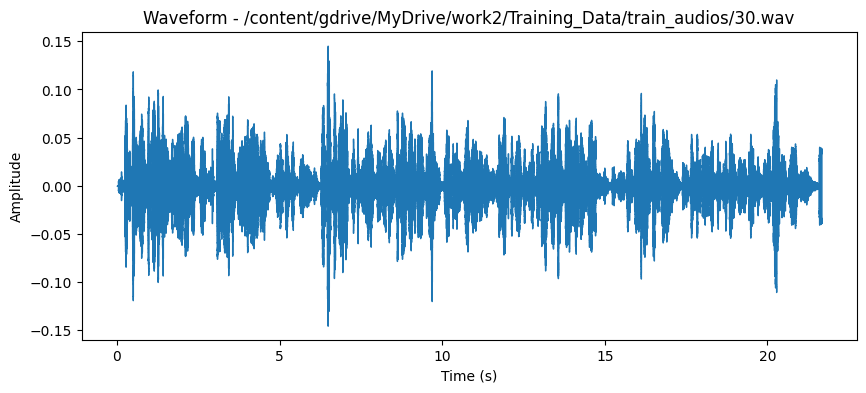

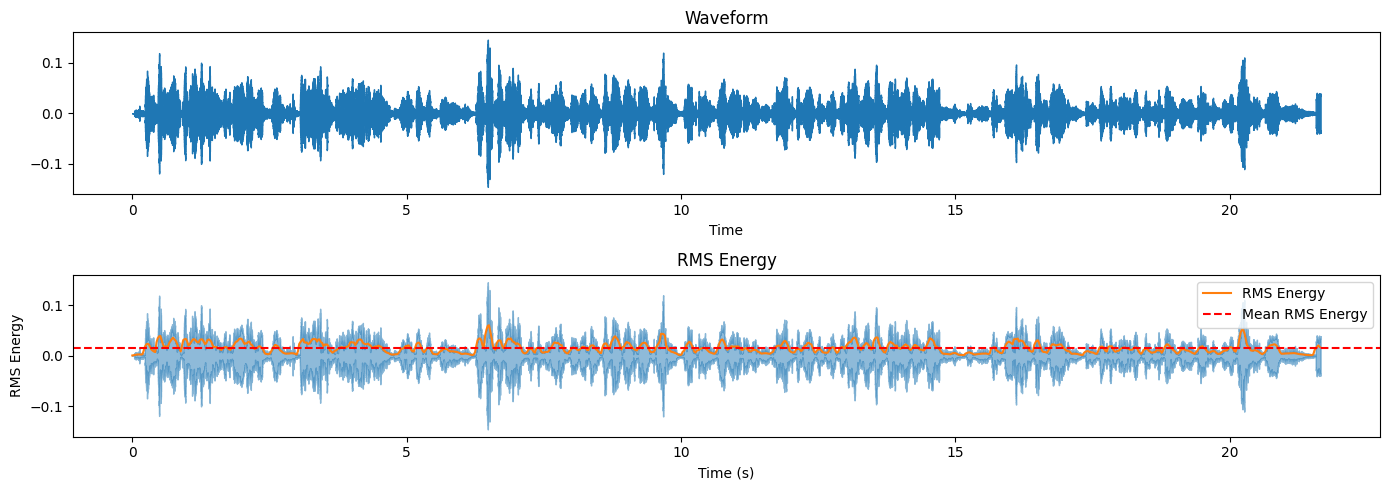

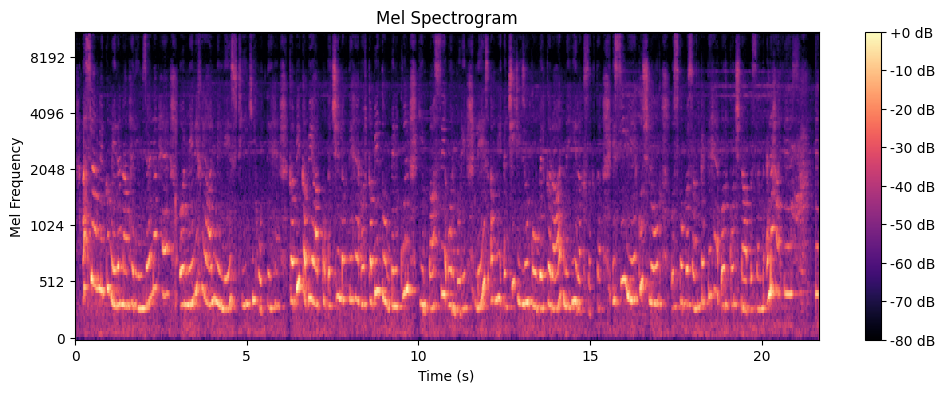

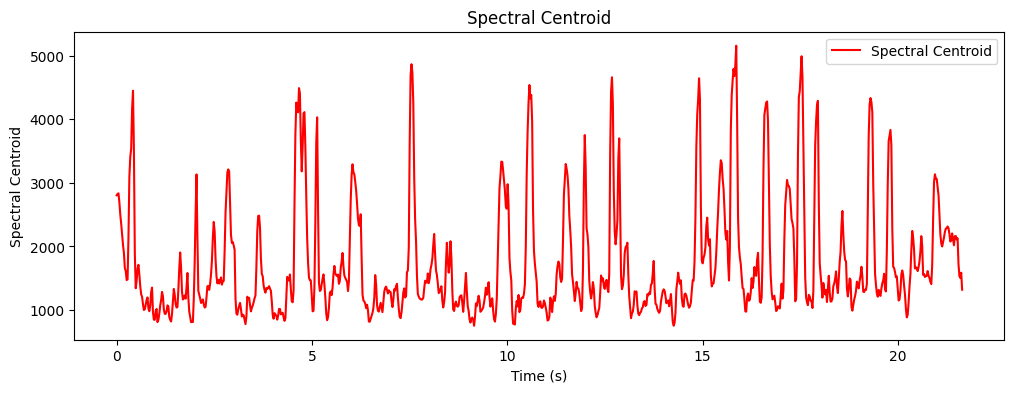

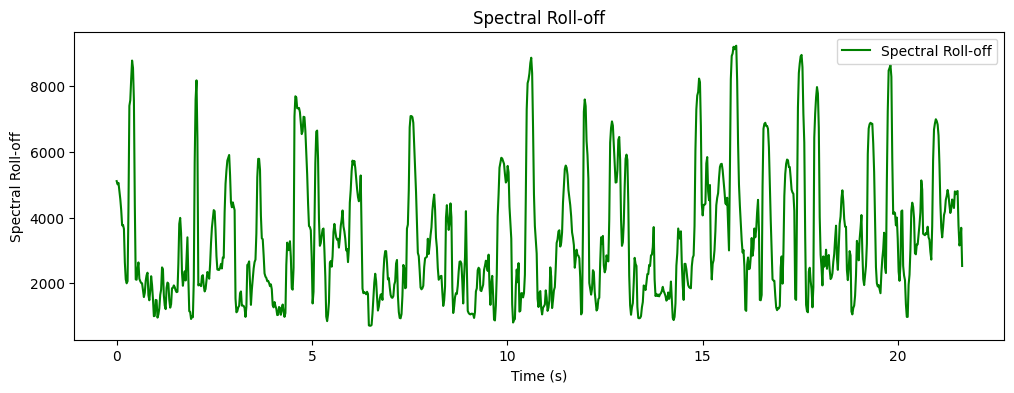

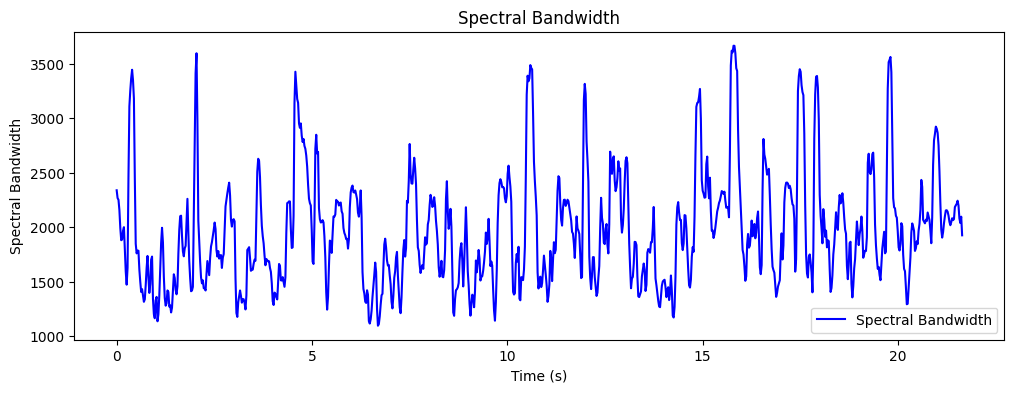

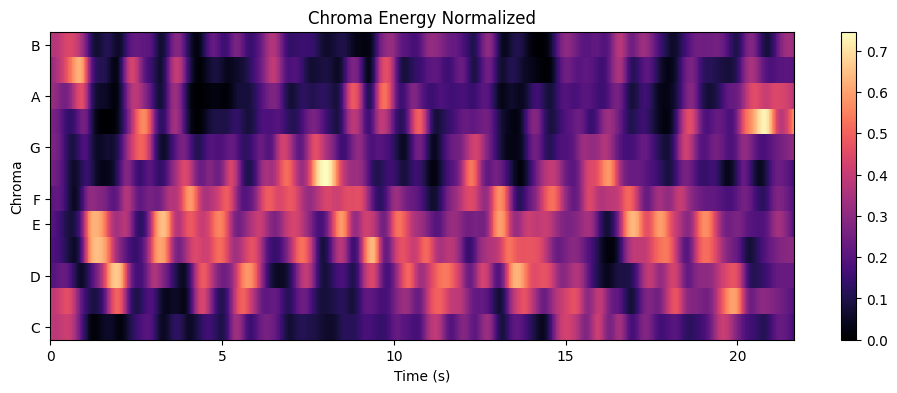

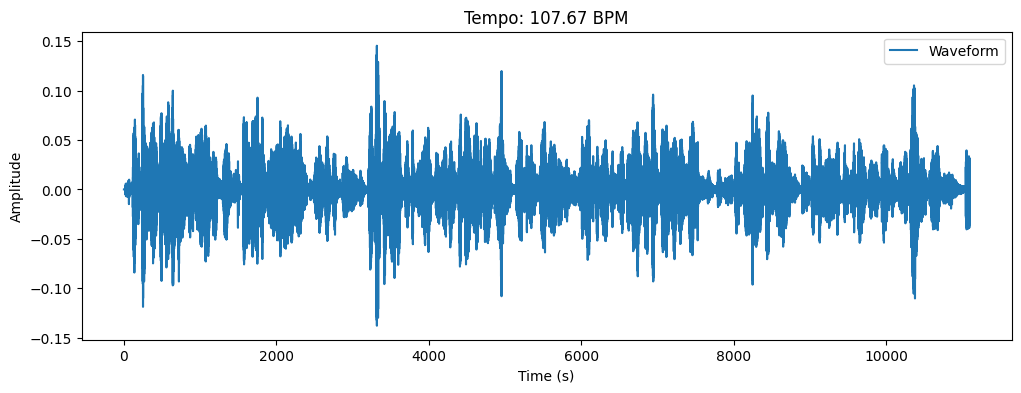

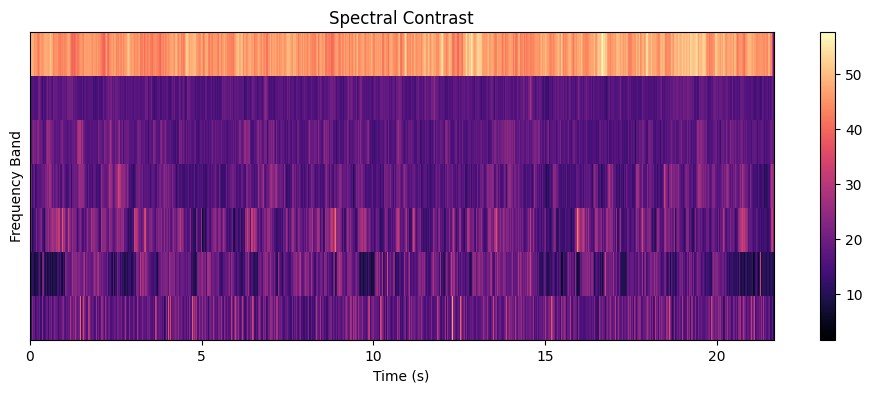

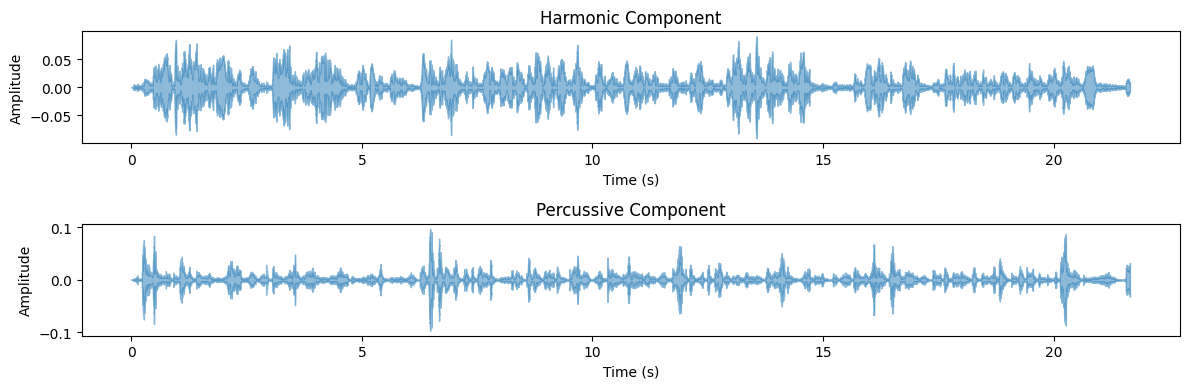

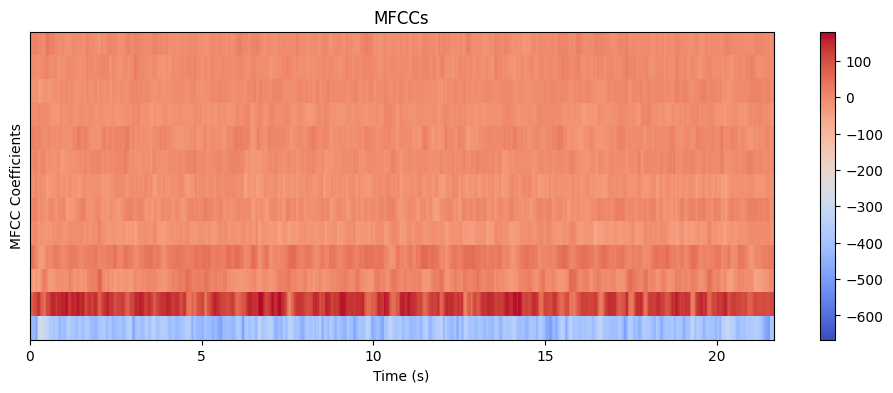

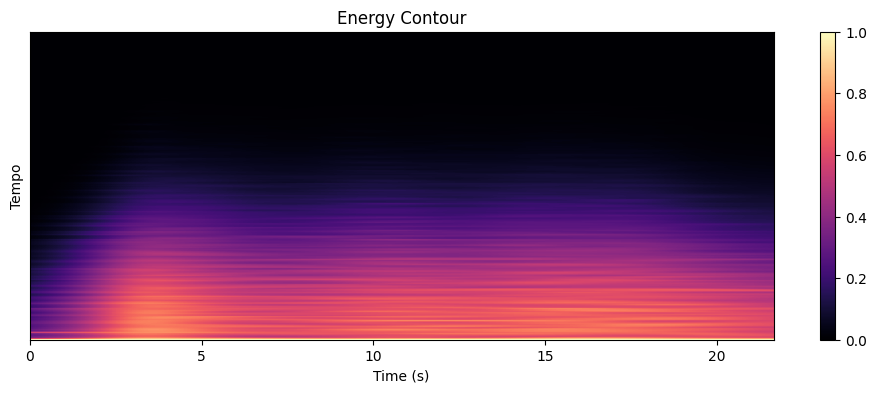

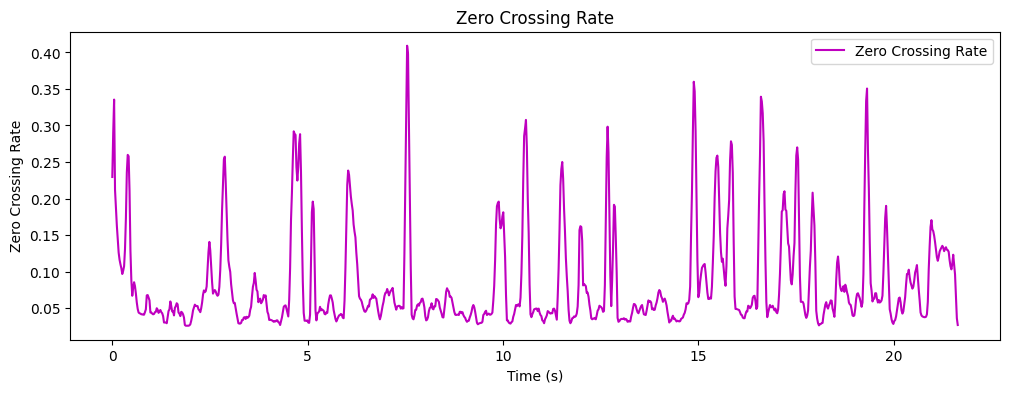

In [7]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


audio_file_paths = ['/content/gdrive/MyDrive/work2/Training_Data/train_audios/30.wav']  # Replace with your audio file paths
# Visualize the audio data
for i, file_path in enumerate(audio_file_paths):
    # Load audio file
    y, sr = librosa.load(file_path)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform - {file_path}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot RMS ( For Plot the waveform and highlight regions where RMS is above a certain threshold)
    rms = librosa.feature.rms(y=y)[0]
    plt.figure(figsize=(14, 5))
    # Plot waveform
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    # Plot RMS
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(y, sr=sr, alpha=0.5)  # Overlay the waveform
    plt.plot(librosa.times_like(rms), rms, label='RMS Energy')
    plt.axhline(y=np.mean(rms), color='r', linestyle='--', label='Mean RMS Energy')
    plt.title('RMS Energy')
    plt.xlabel('Time (s)')
    plt.ylabel('RMS Energy')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Mel Frequency')
    plt.show()

    # Plot Spectral Centroid
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    plt.figure(figsize=(12, 4))
    plt.plot(librosa.times_like(centroid), centroid, label='Spectral Centroid', color='r')
    plt.title('Spectral Centroid')
    plt.xlabel('Time (s)')
    plt.ylabel('Spectral Centroid')
    plt.legend()
    plt.show()

    # Plot Spectral Roll-off
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
    plt.figure(figsize=(12, 4))
    plt.plot(librosa.times_like(rolloff), rolloff, label='Spectral Roll-off', color='g')
    plt.title('Spectral Roll-off')
    plt.xlabel('Time (s)')
    plt.ylabel('Spectral Roll-off')
    plt.legend()
    plt.show()

    # Plot Spectral Bandwidth
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    plt.figure(figsize=(12, 4))
    plt.plot(librosa.times_like(bandwidth), bandwidth, label='Spectral Bandwidth', color='b')
    plt.title('Spectral Bandwidth')
    plt.xlabel('Time (s)')
    plt.ylabel('Spectral Bandwidth')
    plt.legend()
    plt.show()

    # Plot Chroma Energy Normalized
    chroma_energy_normalized = librosa.feature.chroma_cens(y=y, sr=sr)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(chroma_energy_normalized, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chroma Energy Normalized')
    plt.xlabel('Time (s)')
    plt.ylabel('Chroma')
    plt.show()

    # Plot Tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    plt.figure(figsize=(12, 4))
    plt.plot(librosa.times_like(y), y, label='Waveform')
    plt.title(f'Tempo: {tempo[0]:.2f} BPM')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

    # Plot Spectral Contrast
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(contrast, x_axis='time')
    plt.colorbar()
    plt.title('Spectral Contrast')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency Band')
    plt.show()

    # Plot Harmonic & Percussive Components
    harmonic, percussive = librosa.effects.hpss(y)
    plt.figure(figsize=(12, 4))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(harmonic, sr=sr, alpha=0.5)
    plt.title('Harmonic Component')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(percussive, sr=sr, alpha=0.5)
    plt.title('Percussive Component')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

    # Plot MFCC
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs')
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficients')
    plt.show()

    # Plot Energy Contour
    energy_contour = librosa.feature.tempogram(y=y, sr=sr)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(energy_contour, x_axis='time')
    plt.colorbar()
    plt.title('Energy Contour')
    plt.xlabel('Time (s)')
    plt.ylabel('Tempo')
    plt.show()

    # Plot Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y)
    # Plot Zero Crossing Rate
    plt.figure(figsize=(12, 4))
    plt.plot(librosa.times_like(zcr), zcr[0], label='Zero Crossing Rate', color='m')
    plt.title('Zero Crossing Rate')
    plt.xlabel('Time (s)')
    plt.ylabel('Zero Crossing Rate')
    plt.legend()
    plt.show()


In [ ]:
# Load your dataset
# X should be a list of features, y should be a list of labels
import random

####
import librosa
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV  # Import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Example dataset (replace this with your dataset loading code)
X = audio_features

y = [random.randint(0, 2) for _ in range(len(X))]


# Populate X and y with your dataset

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the 1D array to a 2D array with a single column
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier with hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train a RandomForestClassifier with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

best_rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = best_rf_model.predict(X_test_scaled)
print(f"predictions: {predictions}")

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

NameError: name 'audio_features' is not defined